# Pre-procesamiento con NLTK

En Python existe en "Natural Language Toolkit" que tiene un libro asociado (http://www.nltk.org/book/)  

In [1]:
import nltk

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
nltk.download(['punkt','wordnet','gutenberg','webtext'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ville\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ville\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ville\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\ville\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

## Tokens 

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
example = "Hola! Como están? Después de esta clase yo me voy a mi casa"

In [5]:
print(sent_tokenize(example))

['Hola!', 'Como están?', 'Después de esta clase yo me voy a mi casa']


In [6]:
print(word_tokenize(example))

['Hola', '!', 'Como', 'están', '?', 'Después', 'de', 'esta', 'clase', 'yo', 'me', 'voy', 'a', 'mi', 'casa']


## Stopwords

In [7]:
from nltk.corpus import stopwords

In [8]:
stop_words= set(stopwords.words('spanish'))

In [9]:
wordTokens = word_tokenize(example)
print(wordTokens)

['Hola', '!', 'Como', 'están', '?', 'Después', 'de', 'esta', 'clase', 'yo', 'me', 'voy', 'a', 'mi', 'casa']


In [10]:
filtered = [w for w in wordTokens if not w in stop_words]
print(filtered)

['Hola', '!', 'Como', '?', 'Después', 'clase', 'voy', 'casa']


## Stemming vs. lemmatization (English) 

In [11]:
from nltk.stem import PorterStemmer 
ps = PorterStemmer()

In [12]:
exampleWords = ["love", "Loving","loved", "lovelii"]

In [13]:
for w in exampleWords:
    print(ps.stem(w))

love
love
love
lovelii


Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
for w in exampleWords:
    print(lemmatizer.lemmatize(w))

love
Loving
loved
lovelii


In [16]:
# It seems it didn't work! It just copied the words!

## WordNet

In [17]:
from nltk.corpus import wordnet

In [18]:
syns = wordnet.synsets("program")

In [19]:
print(syns[0].name())

plan.n.01


In [20]:
print(syns[0].lemmas()[0].name())

plan


In [21]:
print(syns[0].definition())

a series of steps to be carried out or goals to be accomplished


In [22]:
print(syns[0].examples())

['they drew up a six-step plan', 'they discussed plans for a new bond issue']


In [23]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))

{'full', 'dependable', 'unspoilt', 'estimable', 'honest', 'thoroughly', 'effective', 'right', 'soundly', 'trade_good', 'skillful', 'ripe', 'well', 'serious', 'good', 'respectable', 'practiced', 'undecomposed', 'adept', 'upright', 'secure', 'dear', 'proficient', 'in_force', 'skilful', 'beneficial', 'goodness', 'near', 'salutary', 'expert', 'unspoiled', 'just', 'commodity', 'in_effect', 'honorable', 'sound', 'safe'}


In [24]:
print(set(antonyms))

{'bad', 'evilness', 'ill', 'badness', 'evil'}


## Corpora

El proyecto Gutenberg tiene libros en español http://www.gutenberg.org/ebooks/search/?query=spanish
Y pueden seguir estos pasos para bajar libros automáticamente: https://pypi.org/project/Gutenberg/

Hay muchos tutoriales en internet para aprender a usar NLTK, por ejemplo este: https://vprusso.github.io/blog/2018/natural-language-processing-python-1/

In [25]:
print(nltk.corpus.gutenberg.fileids())


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [26]:
from nltk.text import Text
macbeth = Text(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))

In [27]:
#palabras
print(len(macbeth)) 


23140


In [28]:
#oraciones
print(len(set(macbeth))) 

4017


In [29]:
macbeth.concordance("father")

Displaying 16 of 16 matches:
isse ' em . Had he not resembled My Father as he slept , I had don ' t . My Hu
e of it is stopt Macd . Your Royall Father ' s murther ' d Mal . Oh , by whom 
d former knowings Rosse . Ha , good Father , Thou seest the Heauens , as troub
ier then our new Rosse . Farewell , Father Old M . Gods benyson go with you , 
 my selfe should be the Roote , and Father Of many Kings . If there come truth
 Prophet - like , They hayl ' d him Father to a Line of Kings . Vpon my Head t
or Donalbane To kill their gracious Father ? Damned Fact , How it did greeue M
should finde What ' twere to kill a Father : So should Fleans . But peace ; fo
y Cosine , Blessing vpon you Wife . Father ' d he is , And yet hee ' s Father 
 Father ' d he is , And yet hee ' s Father - lesse Rosse . I am so much a Fool
ore Birds they are not set for : My Father is not dead for all your saying Wif
he is dead : How wilt thou do for a Father ? Son . Nay how will you do for a H
th wit enough for thee 

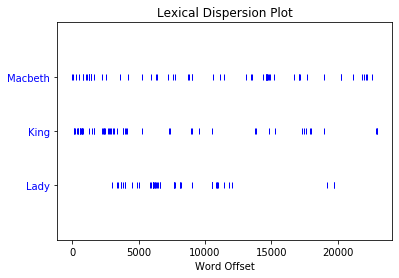

In [30]:
macbeth.dispersion_plot(["Macbeth", "King", "Lady"])

## Contar palabras 

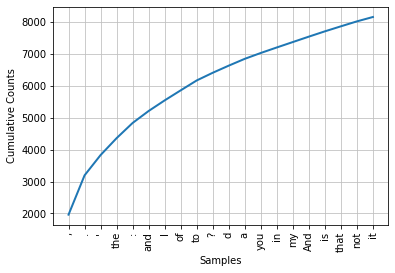

In [31]:
fdist = nltk.FreqDist(macbeth)
fdist.plot(20, cumulative=True)

Eliminando caracteres no alfabéticos

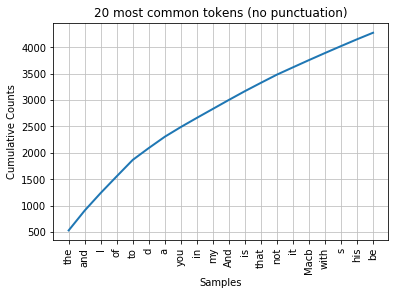

In [32]:
fdist_no_punc = nltk.FreqDist(dict((word, freq) for word, freq in fdist.items() if word.isalpha()))
fdist_no_punc.plot(20, cumulative=True, title="20 most common tokens (no punctuation)")

Eliminando _stopwords_

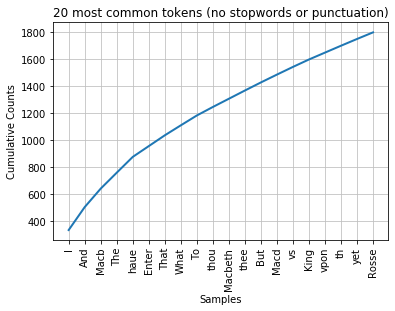

In [33]:
stopwords = nltk.corpus.stopwords.words('english')
fdist_no_punc_no_stopwords = nltk.FreqDist(dict((word, freq) for word, freq in fdist.items() if word not in stopwords and word.isalpha()))
fdist_no_punc_no_stopwords.plot(20, cumulative=True, title="20 most common tokens (no stopwords or punctuation)")

## Nubes de palabras

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [35]:
text = "El curso de estadistica y  probabilidades para el análsis de datos está super bueno!"

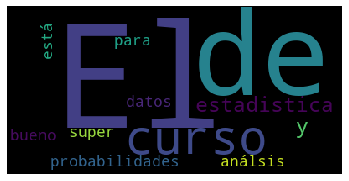

In [36]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Funcionó, pero igual es feo :P

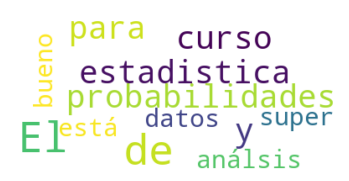

In [37]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Y se pueden hacer nubes con formas también: https://www.datacamp.com/community/tutorials/wordcloud-python.
Estas nubes son más interesantes con textos más grandes. 

In [38]:
macbeth

<Text: The Tragedie of Macbeth by William Shakespeare 1603>

In [39]:
palabras = nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')
palabras

"[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus. Scoena Prima.\n\nThunder and Lightning. Enter three Witches.\n\n  1. When shall we three meet againe?\nIn Thunder, Lightning, or in Raine?\n  2. When the Hurley-burley's done,\nWhen the Battaile's lost, and wonne\n\n   3. That will be ere the set of Sunne\n\n   1. Where the place?\n  2. Vpon the Heath\n\n   3. There to meet with Macbeth\n\n   1. I come, Gray-Malkin\n\n   All. Padock calls anon: faire is foule, and foule is faire,\nHouer through the fogge and filthie ayre.\n\nExeunt.\n\n\nScena Secunda.\n\nAlarum within. Enter King Malcome, Donalbaine, Lenox, with\nattendants,\nmeeting a bleeding Captaine.\n\n  King. What bloody man is that? he can report,\nAs seemeth by his plight, of the Reuolt\nThe newest state\n\n   Mal. This is the Serieant,\nWho like a good and hardie Souldier fought\n'Gainst my Captiuitie: Haile braue friend;\nSay to the King, the knowledge of the Broyle,\nAs thou didst leaue it\n\n   Cap. 

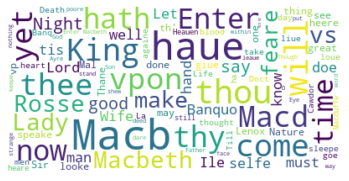

In [40]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(palabras)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Y no sólo hay libros! 

In [41]:
for file_id in nltk.corpus.webtext.fileids():
    print(file_id) 

firefox.txt
grail.txt
overheard.txt
pirates.txt
singles.txt
wine.txt
